<a href="https://colab.research.google.com/github/NguyenLeVu-19146428/CODE-FINAL/blob/main/Nhan_Dien_Dong_Vat_Qua_Am_Thanh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m

In [22]:
with open('../content/drive/MyDrive/FINAL_PROJECT_AI/data.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)
x_pre_1 = x_train[60]
x_pre_2 = x_train[200]
x_train = x_train.astype('float32')
x_train /= 255
y_train = np_utils.to_categorical(y_train, 2)
x_train, y_train = shuffle(x_train, y_train)

In [13]:
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']
  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')
  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

In [23]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (150,150,3)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_43 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_45 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 302ms/step - loss: 8.8602 - acc: 0.4948 - val_loss: 1.7549 - val_acc: 0.5208
Epoch 2/100
3/3 [==============================] - 0s 156ms/step - loss: 1.2003 - acc: 0.5052 - val_loss: 0.7563 - val_acc: 0.4792
Epoch 3/100
3/3 [==============================] - 0s 153ms/step - loss: 0.7570 - acc: 0.4115 - val_loss: 0.6806 - val_acc: 0.5208
Epoch 4/100
3/3 [==============================] - 0s 152ms/step - loss: 0.6662 - acc: 0.6406 - val_loss: 0.6737 - val_acc: 0.4792
Epoch 5/100
3/3 [==============================] - 0s 156ms/step - loss: 0.6255 - acc: 0.7969 - val_loss: 0.6075 - val_acc: 0.5417
Epoch 6/100
3/3 [==============================] - 0s 160ms/step - loss: 0.5559 - acc: 0.8229 - val_loss: 0.5139 - val_acc: 0.9167
Epoch 7/100
3/3 [==============================] - 0s 185ms/step - loss: 0.4686 - acc: 0.8021 - val_loss: 0.6380 - val_acc: 0.5625
Epoch 8/100
3/3 [==============================] - 1s 192ms/step - loss: 0.4038 - acc: 0.8750 -

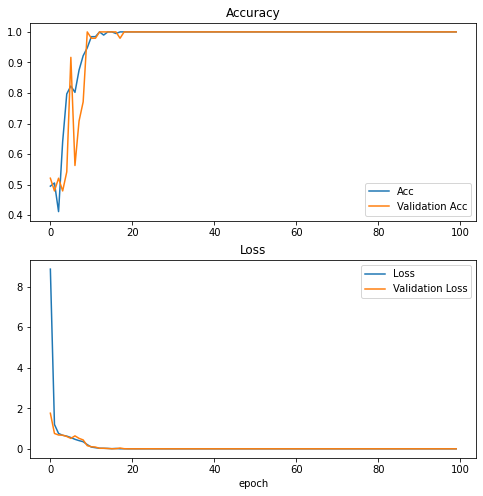

In [24]:
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])
his = model.fit(x_train, y_train, epochs = 100, batch_size = 64, validation_split = 0.2)
plot_history(his)

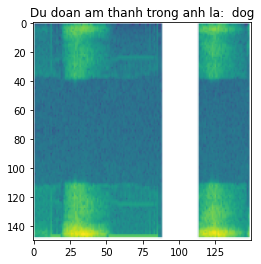

In [25]:
label = ['dog', 'bird']
plt.title("Du doan am thanh trong anh la:  " + label[np.argmax(model.predict(x_pre_1.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_1, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

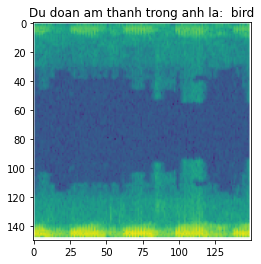

In [26]:
plt.title("Du doan am thanh trong anh la:  " + label[np.argmax(model.predict(x_pre_2.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_2, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

In [ ]:
plt.title("Du doan nguoi trong anh la:  " + label[np.argmax(model.predict(x_pre_3.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_3, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))